<a href="https://colab.research.google.com/github/luisafelixx/Fairness_Diabetes/blob/main/pr%C3%A9_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install aif360


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.0 MB/s eta 0:00:00


In [ ]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para manipulação de dados e modelagem
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

# Métricas de avaliação
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'
pip install 'aif360[OptimalTransport]'


# Análises

In [ ]:
data = pd.read_csv('dados_limpos2015.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.shape

(251467, 24)

In [ ]:
data.head()

,Diabetes,PressAlta,ColestAlto,VerifColest,IMC,Fumante,Derrame,DoencaCardiaca,AtivFisica,Frutas,Vegetais,ConsumoAlcool,AssistMedica,SemMedicoCusto,SaudeGeral,SaudeMental,SaudeFisica,DificCaminhar,Sexo,Idade,Escolaridade,Renda,Etnia,Estado
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,1.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,5.0,1.0


In [ ]:
data.describe(include = "all")

,Diabetes,PressAlta,ColestAlto,VerifColest,IMC,Fumante,Derrame,DoencaCardiaca,AtivFisica,Frutas,Vegetais,ConsumoAlcool,AssistMedica,SemMedicoCusto,SaudeGeral,SaudeMental,SaudeFisica,DificCaminhar,Sexo,Idade,Escolaridade,Renda,Etnia,Estado
count,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.00000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000,251467.000000
mean,0.157345,0.428915,0.424163,0.962842,28.380841,0.442837,0.040467,0.094008,0.756668,0.634155,0.811474,0.056238,0.951250,0.083796,2.51031,3.180425,4.231772,0.167962,0.439429,8.031050,5.051180,6.056715,1.398486,30.093857
std,0.364126,0.494922,0.494216,0.189149,6.606212,0.496723,0.197051,0.291841,0.429095,0.481667,0.391132,0.230381,0.215345,0.277083,1.06765,7.406515,8.706607,0.373834,0.496319,3.053821,0.984989,2.069854,0.910966,16.042699
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,1.000000,18.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,1.000000,29.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.00000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000,44.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.00000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,5.000000,72.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251467 entries, 0 to 251466
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Diabetes        251467 non-null  float64
 1   PressAlta       251467 non-null  float64
 2   ColestAlto      251467 non-null  float64
 3   VerifColest     251467 non-null  float64
 4   IMC             251467 non-null  float64
 5   Fumante         251467 non-null  float64
 6   Derrame         251467 non-null  float64
 7   DoencaCardiaca  251467 non-null  float64
 8   AtivFisica      251467 non-null  float64
 9   Frutas          251467 non-null  float64
 10  Vegetais        251467 non-null  float64
 11  ConsumoAlcool   251467 non-null  float64
 12  AssistMedica    251467 non-null  float64
 13  SemMedicoCusto  251467 non-null  float64
 14  SaudeGeral      251467 non-null  float64
 15  SaudeMental     251467 non-null  float64
 16  SaudeFisica     251467 non-null  float64
 17  DificCamin

In [ ]:
for coluna in data.columns:
  print(f"{data[coluna].value_counts()}")
  print("\n")

Diabetes
0.0    211900
1.0     39567
Name: count, dtype: int64


PressAlta
0.0    143609
1.0    107858
Name: count, dtype: int64


ColestAlto
0.0    144804
1.0    106663
Name: count, dtype: int64


VerifColest
1.0    242123
0.0      9344
Name: count, dtype: int64


IMC
27.0    24365
26.0    20367
24.0    19380
25.0    17011
28.0    16396
        ...  
85.0        1
86.0        1
91.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64


Fumante
0.0    140108
1.0    111359
Name: count, dtype: int64


Derrame
0.0    241291
1.0     10176
Name: count, dtype: int64


DoencaCardiaca
0.0    227827
1.0     23640
Name: count, dtype: int64


AtivFisica
1.0    190277
0.0     61190
Name: count, dtype: int64


Frutas
1.0    159469
0.0     91998
Name: count, dtype: int64


Vegetais
1.0    204059
0.0     47408
Name: count, dtype: int64


ConsumoAlcool
0.0    237325
1.0     14142
Name: count, dtype: int64


AssistMedica
1.0    239208
0.0     12259
Name: count, dtype: int64


Sem

# Visualizações Gráficas


## Gráficos de Pizza (colunas boleanas)

Colunas Binárias:
Diabetes,
PressAlta,
ColestAlto,
VerifColest,
Fumante,
Derrame,
DoencaCardiaca,
AtivFisica,
Frutas,
Vegetais,
ConsumoAlcool,
AssistMedica,
SemMedicoCusto,
DificCaminhar,
Sexo

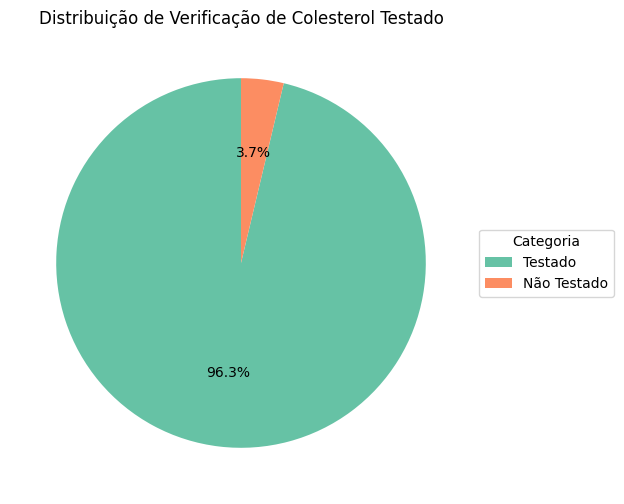

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['VerifColest'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Verificação de Colesterol Testado')

plt.legend(
    wedges,
    ['Testado', 'Não Testado'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

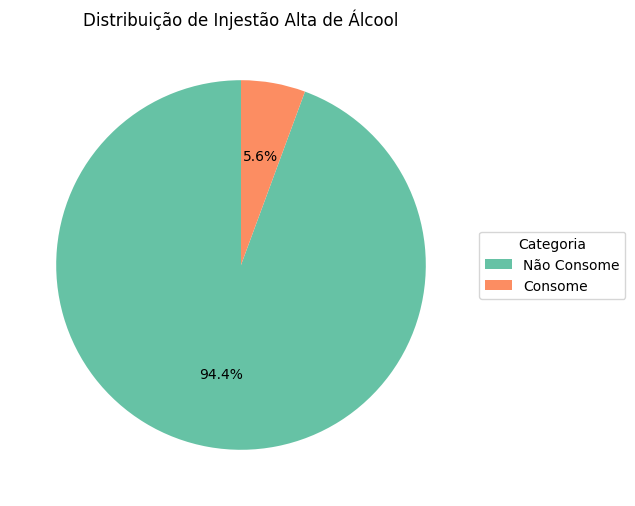

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['ConsumoAlcool'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Injestão Alta de Álcool')

plt.legend(
    wedges,
    ['Não Consome', 'Consome'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

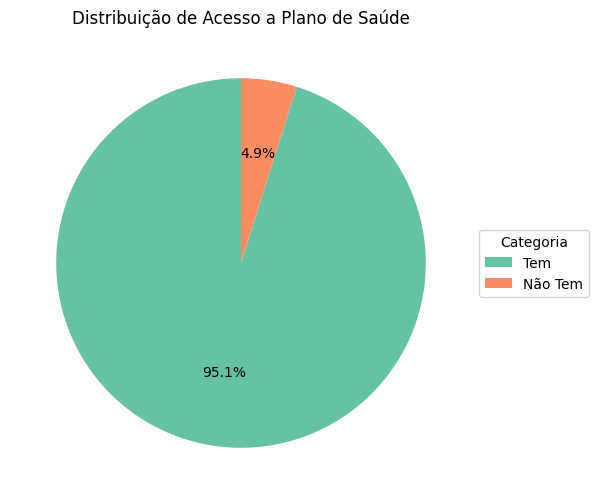

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['AssistMedica'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Acesso a Plano de Saúde')

plt.legend(
    wedges,
    ['Tem', 'Não Tem'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

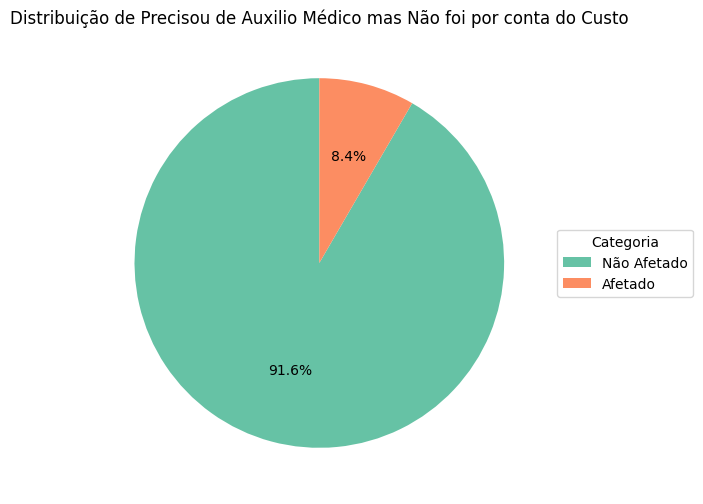

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['SemMedicoCusto'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Precisou de Auxilio Médico mas Não foi por conta do Custo')

plt.legend(
    wedges,
    ['Não Afetado', 'Afetado'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

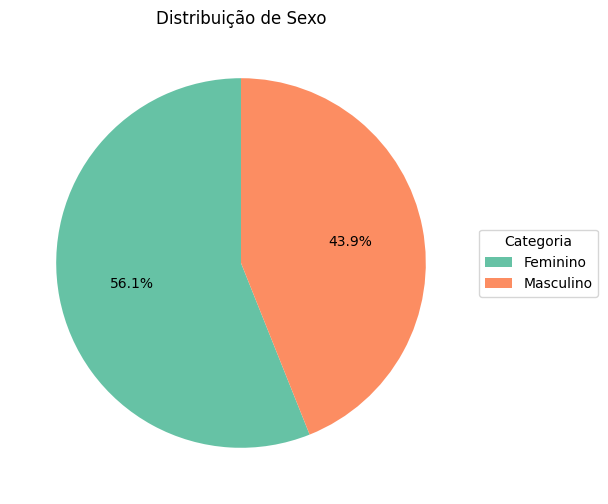

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['Sexo'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Sexo')

plt.legend(
    wedges,
    ['Feminino', 'Masculino'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

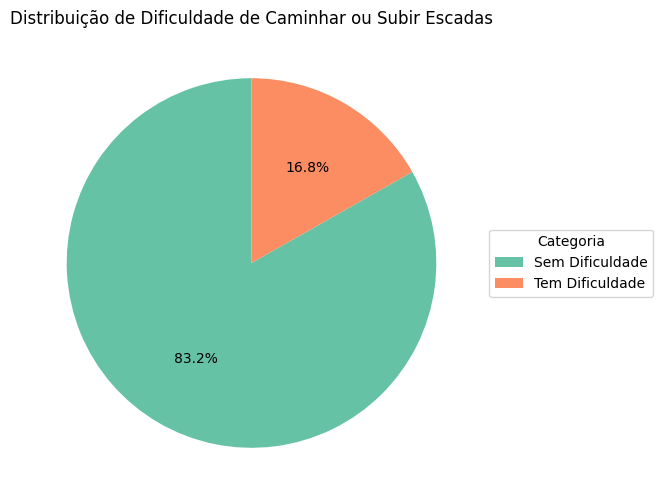

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['DificCaminhar'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Dificuldade de Caminhar ou Subir Escadas')

plt.legend(
    wedges,
    ['Sem Dificuldade', 'Tem Dificuldade'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

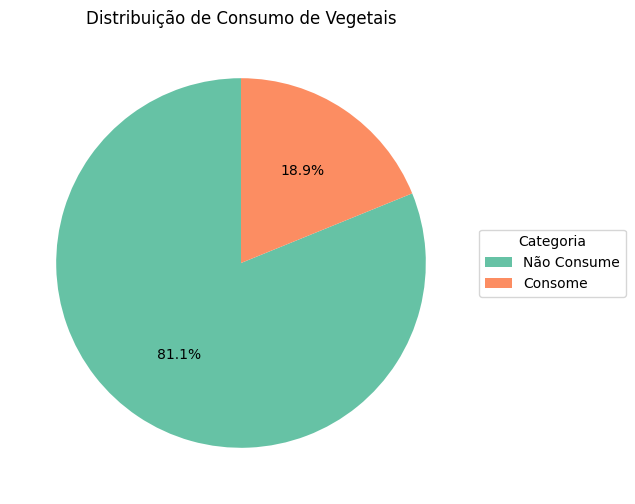

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['Vegetais'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Consumo de Vegetais')

plt.legend(
    wedges,
    ['Não Consume', 'Consome'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

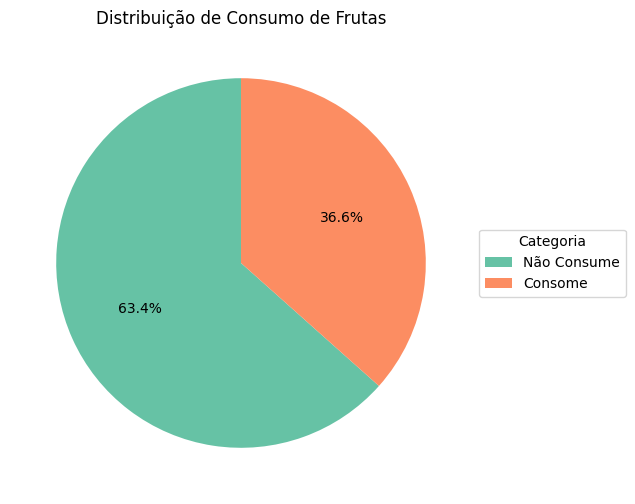

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['Frutas'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Consumo de Frutas')

plt.legend(
    wedges,
    ['Não Consume', 'Consome'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

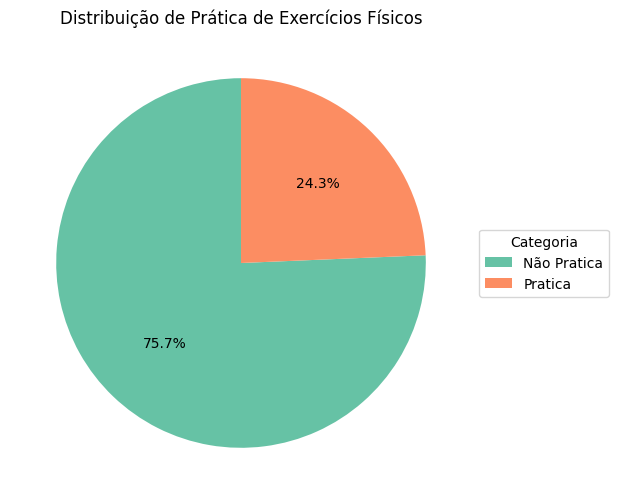

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['AtivFisica'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Prática de Exercícios Físicos')

plt.legend(
    wedges,
    ['Não Pratica', 'Pratica'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

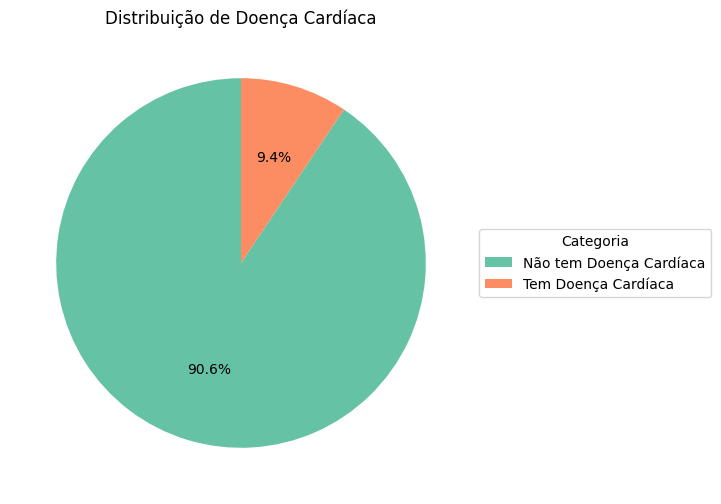

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['DoencaCardiaca'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Doença Cardíaca')

plt.legend(
    wedges,
    ['Não tem Doença Cardíaca', 'Tem Doença Cardíaca'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

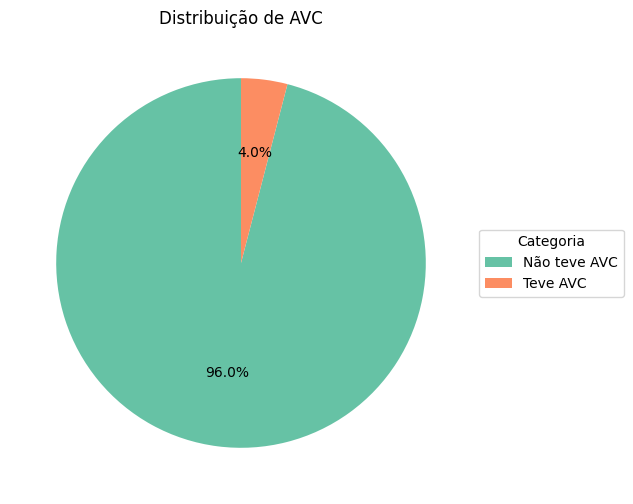

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['Derrame'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de AVC')

plt.legend(
    wedges,
    ['Não teve AVC', 'Teve AVC'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

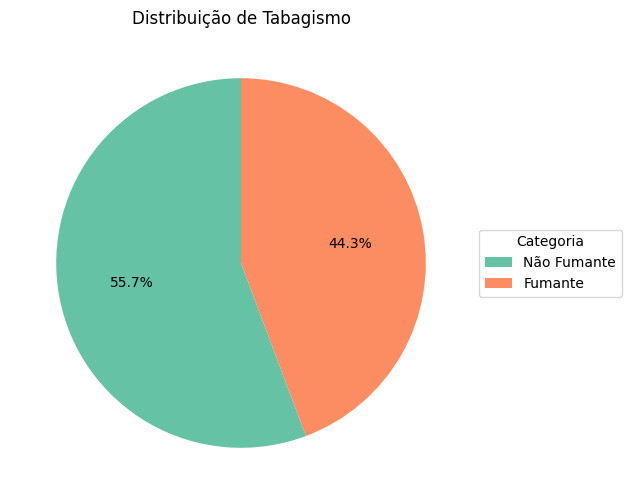

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['Fumante'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Tabagismo')

plt.legend(
    wedges,
    ['Não Fumante', 'Fumante'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

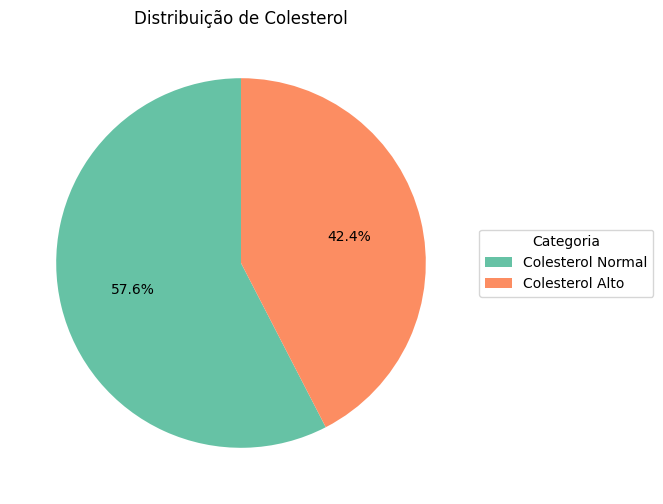

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['ColestAlto'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Colesterol')

plt.legend(
    wedges,
    ['Colesterol Normal', 'Colesterol Alto'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

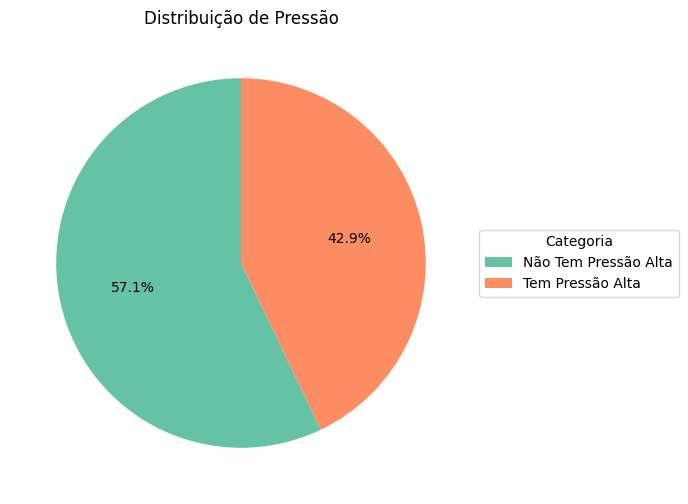

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['PressAlta'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Pressão')

plt.legend(
    wedges,
    ['Não Tem Pressão Alta', 'Tem Pressão Alta'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

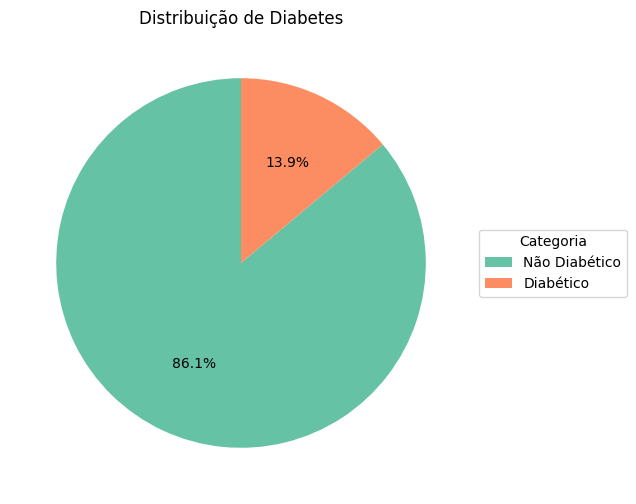

In [ ]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2")

wedges, texts, autotexts = plt.pie(
    data['Diabetes'].value_counts(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)


plt.title('Distribuição de Diabetes')

plt.legend(
    wedges,
    ['Não Diabético', 'Diabético'],
    title="Categoria",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

## Histogramas

Colunas Multivaloradas:
IMC,
SaudeGeral,
SaudeMental,
SaudeFisica,
Idade,
Escolaridade,
Renda,
Etnia,
Estado

In [ ]:
import geopandas as gpd
import plotly.express as px

# Dados geoespaciais dos EUA
us_states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

state_mapping = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado',
    9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida',
    13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana',
    19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine',
    24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota',
    28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska',
    32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
    36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio',
    40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island',
    45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas',
    49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington', 54: 'West Virginia',
    55: 'Wisconsin', 56: 'Wyoming', 66: 'Guam', 72: 'Puerto Rico'
}


data['Estado_Nome'] = data['Estado'].map(state_mapping)

frequencias = data['Estado_Nome'].value_counts().reset_index()
frequencias.columns = ['Estado_Nome', 'Frequencia']

# Normalizar os nomes dos estados para maiúsculas
frequencias['Estado_Nome'] = frequencias['Estado_Nome'].str.upper()
us_states['name'] = us_states['name'].str.upper()

todos_estados = pd.DataFrame(us_states['name'].unique(), columns=['Estado_Nome'])

frequencias_completas = todos_estados.merge(frequencias, on='Estado_Nome', how='left').fillna(0)

merged = us_states.merge(frequencias_completas, left_on='name', right_on='Estado_Nome', how='left')

fig = px.choropleth_mapbox(
    merged,
    geojson=merged.geometry,
    locations=merged.index,
    color='Frequencia',
    color_continuous_scale="Viridis",
    range_color=(0, merged['Frequencia'].max()),
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 37.0902, "lon": -95.7129},
    opacity=0.6,
    labels={'Frequencia': 'Frequência'}
)

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()


data.drop(columns=['Estado_Nome'], inplace=True)


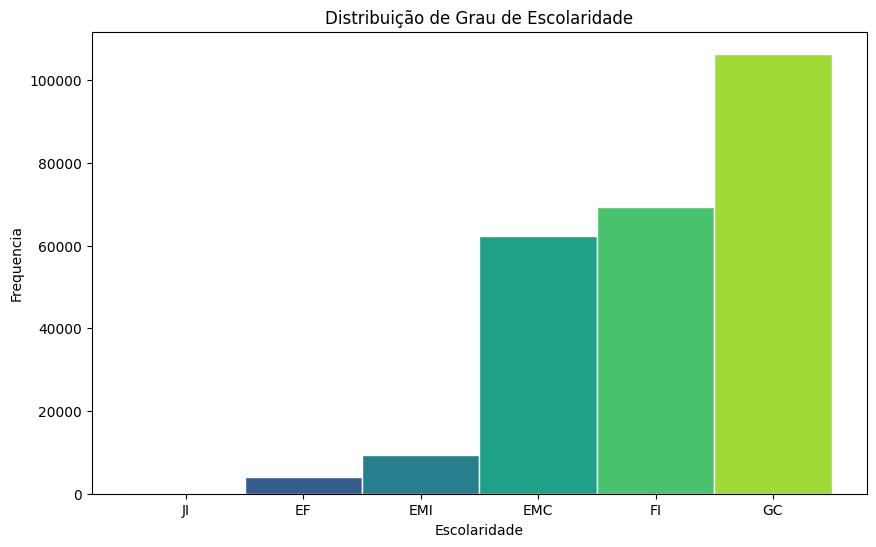

In [ ]:
plt.figure(figsize=(10, 6))

classificacao = ["JI",
                 "EF",
                 "EMI",
                 "EMC",
                 "FI",
                 "GC"]

colors = sns.color_palette("viridis", len(classificacao))

sns.histplot(
    data=data,
    x='Escolaridade',
    edgecolor="white",
    discrete=True,
    multiple='stack'
)

bars = plt.gca().patches
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.xlabel("Escolaridade")
plt.ylabel("Frequencia")
plt.title("Distribuição de Grau de Escolaridade")
plt.xticks(range(1, len(classificacao) + 1), classificacao)
plt.show()

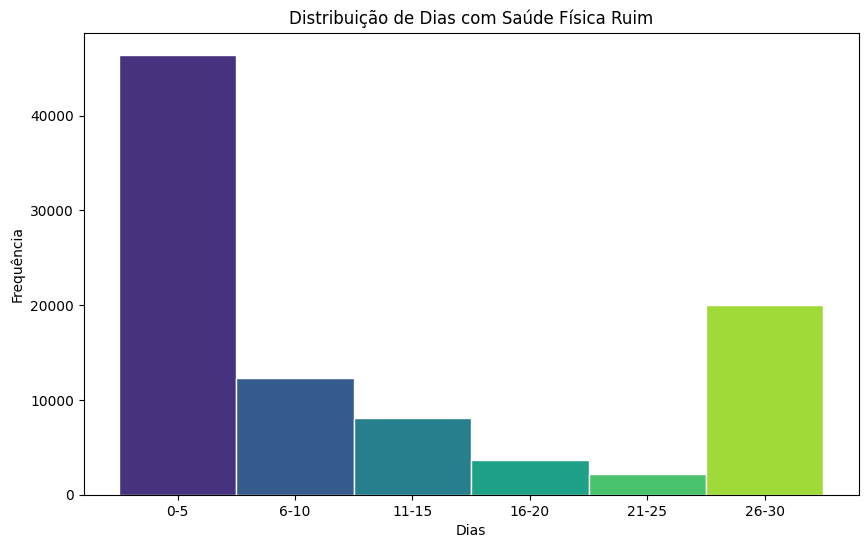

In [ ]:
data['SaudeFisicaAgrupada'] = pd.cut(
    data['SaudeFisica'],
    bins=[0, 5, 10, 15, 20, 25, 30],
    labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
)


classificacao = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
colors = sns.color_palette("viridis", len(classificacao))


plt.figure(figsize=(10, 6))
sns.histplot(
    data=data,
    x='SaudeFisicaAgrupada',
    edgecolor="white",
    multiple='stack'
)

bars = plt.gca().patches
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.xlabel("Dias")
plt.ylabel("Frequência")
plt.title("Distribuição de Dias com Saúde Física Ruim")
plt.show()

data.drop(columns=['SaudeFisicaAgrupada'], inplace=True)

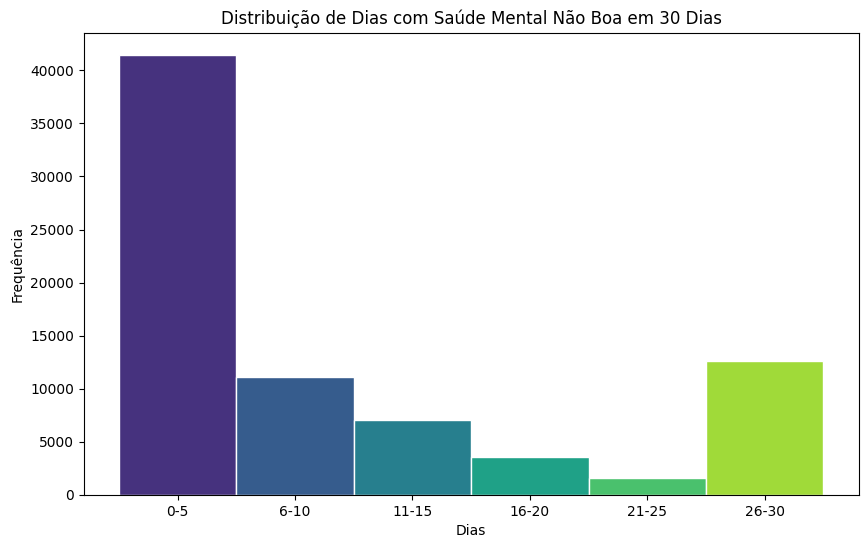

In [ ]:
data['SaudeMentalAgrupada'] = pd.cut(
    data['SaudeMental'],
    bins=[0, 5, 10, 15, 20, 25, 30],
    labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
)


classificacao = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
colors = sns.color_palette("viridis", len(classificacao))


plt.figure(figsize=(10, 6))
sns.histplot(
    data=data,
    x='SaudeMentalAgrupada',
    edgecolor="white",
    multiple='stack'
)

bars = plt.gca().patches
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.xlabel("Dias")
plt.ylabel("Frequência")
plt.title("Distribuição de Dias com Saúde Mental Não Boa em 30 Dias")
plt.show()

data.drop(columns=['SaudeMentalAgrupada'], inplace=True)

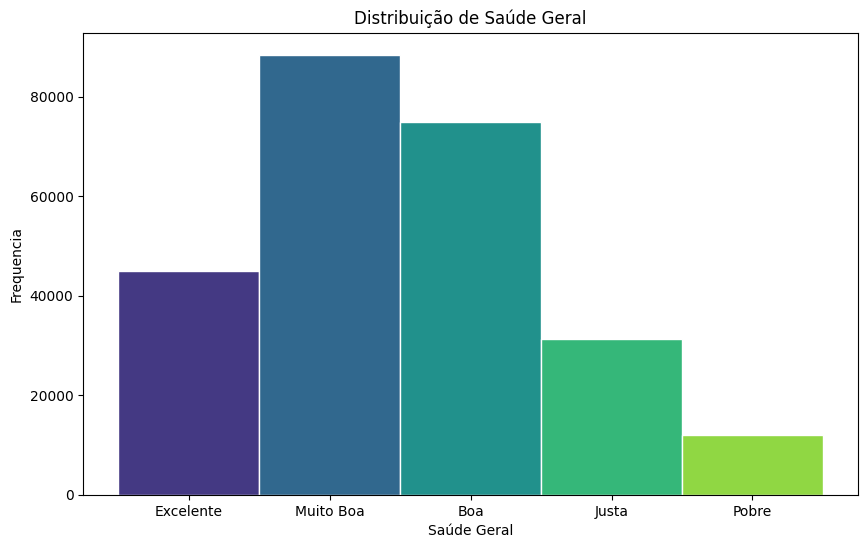

In [ ]:
plt.figure(figsize=(10, 6))

classificacao = ["Excelente", "Muito Boa", "Boa", "Justa", "Pobre"]

colors = sns.color_palette("viridis", len(classificacao))

sns.histplot(
    data=data,
    x='SaudeGeral',
    edgecolor="white",
    discrete=True,
    multiple='stack'
)

bars = plt.gca().patches
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.xlabel("Saúde Geral")
plt.ylabel("Frequencia")
plt.title("Distribuição de Saúde Geral")
plt.xticks(range(1, len(classificacao) + 1), classificacao)
plt.show()

Coluna retirada

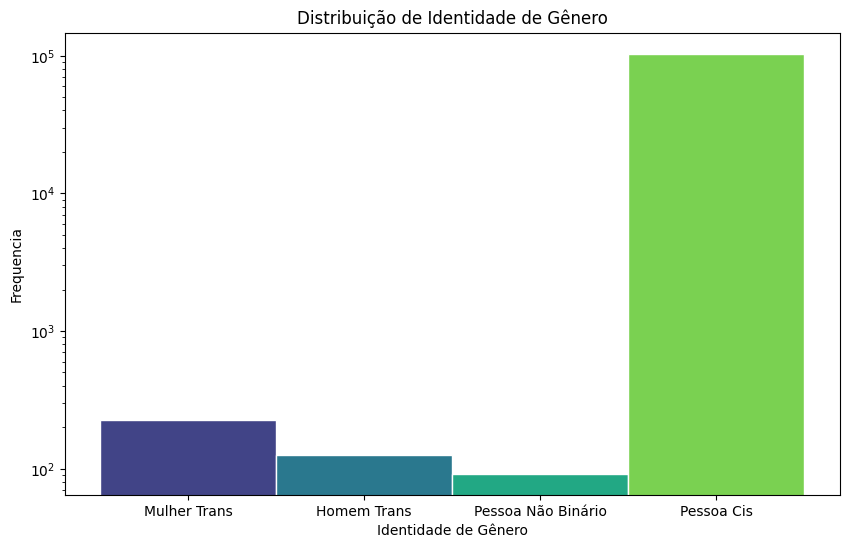

In [ ]:
plt.figure(figsize=(10, 6))

genero = ["Mulher Trans", "Homem Trans", "Pessoa Não Binário", "Pessoa Cis"]

colors = sns.color_palette("viridis", len(genero))

sns.histplot(
    data=data,
    x='IdentidadeGenero',
    edgecolor="white",
    discrete=True,
    multiple='stack'
)

bars = plt.gca().patches
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.xlabel("Identidade de Gênero")
plt.ylabel("Frequencia")
plt.title("Distribuição de Identidade de Gênero")
plt.xticks(range(1, len(genero) + 1), genero)
plt.yscale('log')
plt.show()

Coluna retirada

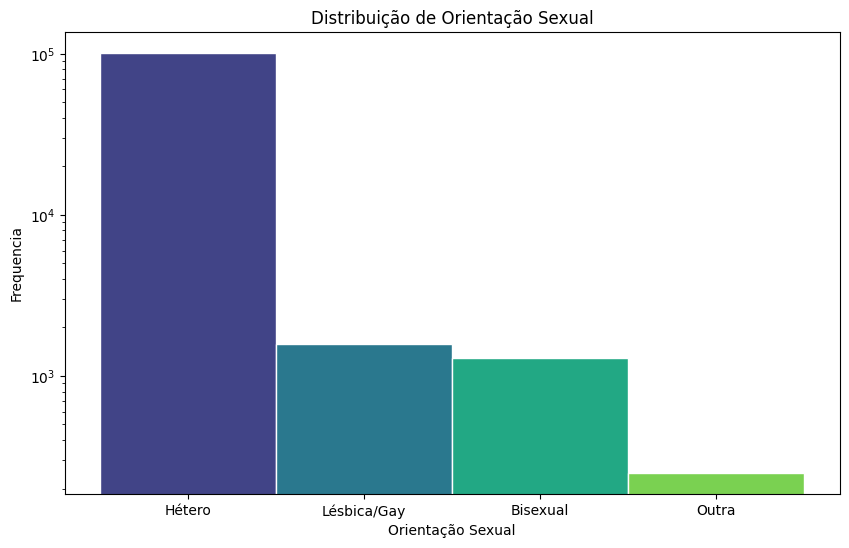

In [ ]:
plt.figure(figsize=(10, 6))

orientacao = ["Hétero", "Lésbica/Gay", "Bisexual", "Outra"]

colors = sns.color_palette("viridis", len(orientacao))

sns.histplot(
    data=data,
    x='OrientacaoSexual',
    edgecolor="white",
    discrete=True,
    multiple='stack'
)

bars = plt.gca().patches
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.xlabel("Orientação Sexual")
plt.ylabel("Frequencia")
plt.title("Distribuição de Orientação Sexual")
plt.xticks(range(1, len(orientacao) + 1), orientacao)
plt.yscale('log')
plt.show()

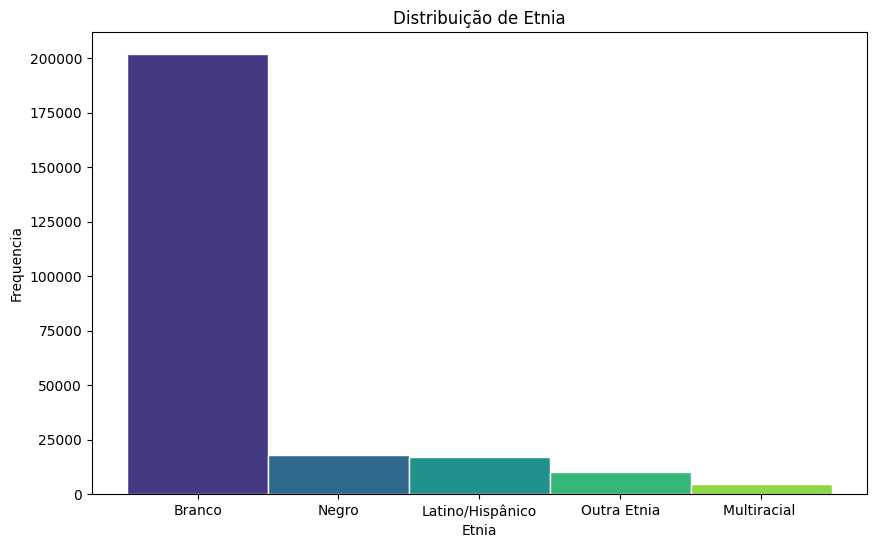

In [ ]:
plt.figure(figsize=(10, 6))

racas = ["Branco", "Negro", "Latino/Hispânico", "Outra Etnia", "Multiracial "]

colors = sns.color_palette("viridis", len(racas))

sns.histplot(
    data=data,
    x='Etnia',
    edgecolor="white",
    discrete=True,
    multiple='stack'
)

bars = plt.gca().patches
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.xlabel("Etnia")
plt.ylabel("Frequencia")
plt.title("Distribuição de Etnia")
plt.xticks(range(1, len(racas) + 1), racas)
plt.show()

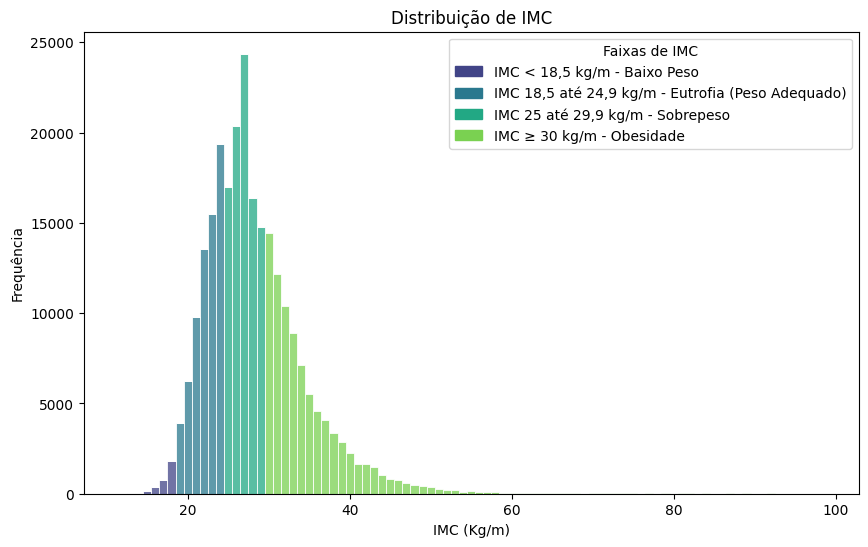

In [ ]:
def categoriza_imc(imc):
    if imc < 18.5:
        return 'Baixo Peso'
    elif 18.5 <= imc <= 24.9:
        return 'Eutrofia (Peso Adequado)'
    elif 25 <= imc <= 29.9:
        return 'Sobrepeso'
    elif imc >= 30:
        return 'Obesidade'

data['Categoria IMC'] = data['IMC'].apply(categoriza_imc)


viridis_colors = sns.color_palette("viridis", n_colors=4)
palette = {
    'Baixo Peso': viridis_colors[0],
    'Eutrofia (Peso Adequado)': viridis_colors[1],
    'Sobrepeso': viridis_colors[2],
    'Obesidade': viridis_colors[3]
}


plt.figure(figsize=(10, 6))
sns.histplot(
    data=data,
    x='IMC',
    hue='Categoria IMC',
    palette=palette,
    edgecolor="white",
    discrete=True,
    multiple='stack'
)

plt.xlabel("IMC (Kg/m)")
plt.ylabel("Frequência")
plt.title("Distribuição de IMC")

baixo_peso = mpatches.Patch(color=viridis_colors[0], label='IMC < 18,5 kg/m - Baixo Peso')
eutrofia = mpatches.Patch(color=viridis_colors[1], label='IMC 18,5 até 24,9 kg/m - Eutrofia (Peso Adequado)')
sobrepeso = mpatches.Patch(color=viridis_colors[2], label='IMC 25 até 29,9 kg/m - Sobrepeso')
obesidade = mpatches.Patch(color=viridis_colors[3], label='IMC ≥ 30 kg/m - Obesidade')

plt.legend(handles=[baixo_peso, eutrofia, sobrepeso, obesidade], title='Faixas de IMC')
plt.show()

data.drop(columns=['Categoria IMC'], inplace=True)

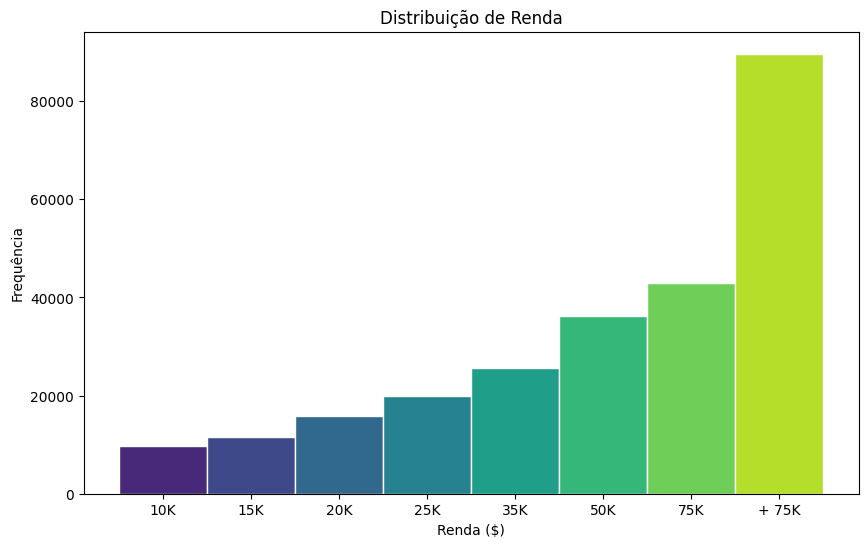

In [ ]:
intervalo_renda = ["10K", "15K", "20K", "25K", "35K", "50K", "75K", "+ 75K"]

colors = sns.color_palette("viridis", len(intervalo_renda))

plt.figure(figsize=(10, 6))
sns.histplot(
    data=data,
    x='Renda',
    discrete=True,
    edgecolor="white",
)

bars = plt.gca().patches
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.xlabel("Renda ($)")
plt.ylabel("Frequência")
plt.title("Distribuição de Renda")
plt.xticks(range(1, len(intervalo_renda) + 1), intervalo_renda)
plt.show()


<ipython-input-31-f711b31cdb4e>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



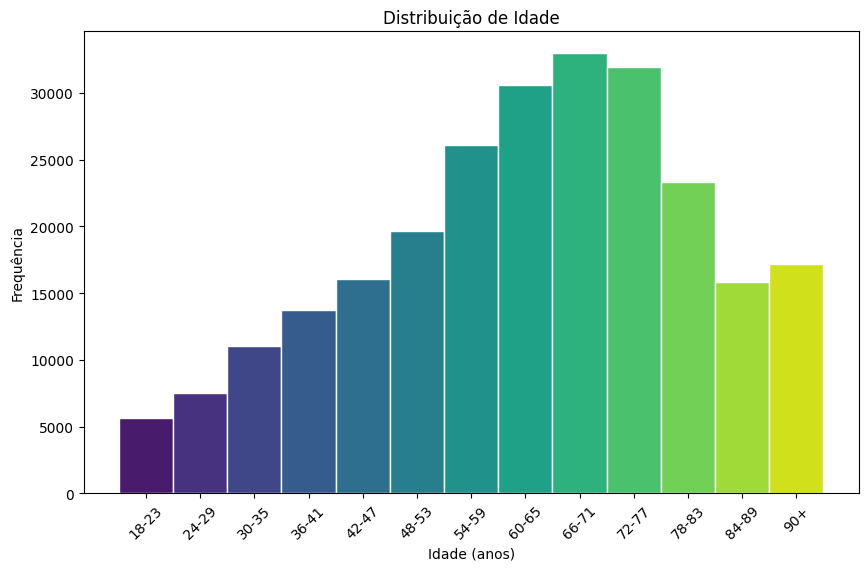

In [ ]:
intervalos = [
    "18-23", "24-29", "30-35", "36-41", "42-47",
    "48-53", "54-59", "60-65", "66-71", "72-77",
    "78-83", "84-89", "90+"
]

colors = sns.color_palette("viridis", len(intervalos))

plt.figure(figsize=(10, 6))

sns.histplot(
    data=data,
    x='Idade',
    discrete=True,
    edgecolor="white",
    multiple='dodge',
    palette='viridis'
)

bars = plt.gca().patches
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

plt.title("Distribuição de Idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Frequência")
plt.xticks(range(1, len(intervalos) + 1), intervalos, rotation=45)
plt.show()

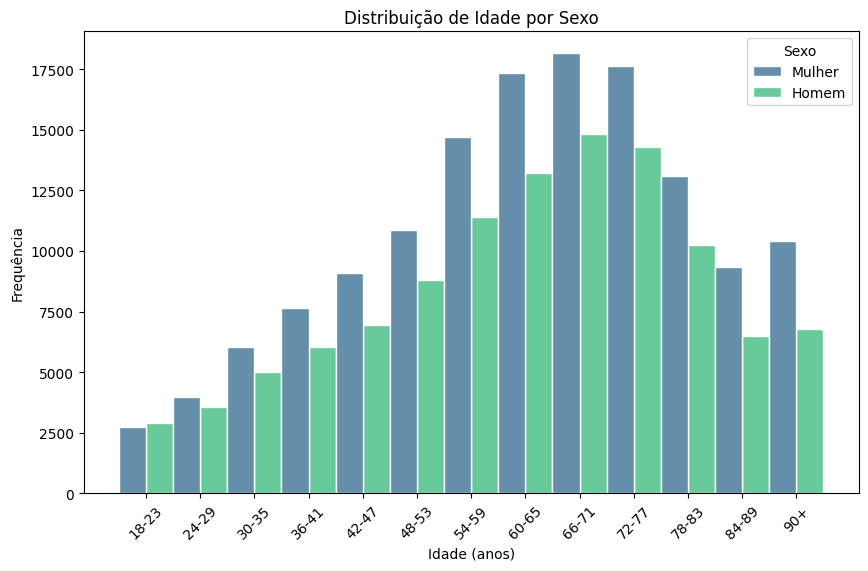

In [ ]:
intervalos = [
    "18-23", "24-29", "30-35", "36-41", "42-47",
    "48-53", "54-59", "60-65", "66-71", "72-77",
    "78-83", "84-89", "90+"
]

plt.figure(figsize=(10, 6))

sns.histplot(
    data=data,
    x='Idade',
    discrete=True,
    edgecolor="white",
    hue=data['Sexo'].replace({0: 'Mulher', 1: 'Homem'}),
    multiple='dodge',
    palette='viridis'
)

plt.title("Distribuição de Idade por Sexo")
plt.xlabel("Idade (anos)")
plt.ylabel("Frequência")
plt.xticks(range(1, len(intervalos) + 1), intervalos, rotation=45)
plt.show()

In [ ]:
data.columns

Index(['Diabetes', 'PressAlta', 'ColestAlto', 'VerifColest', 'IMC', 'Fumante',
       'Derrame', 'DoencaCardiaca', 'AtivFisica', 'Frutas', 'Vegetais',
       'ConsumoAlcool', 'AssistMedica', 'SemMedicoCusto', 'SaudeGeral',
       'SaudeMental', 'SaudeFisica', 'DificCaminhar', 'Sexo', 'Idade',
       'Escolaridade', 'Renda', 'OrientacaoSexual', 'IdentidadeGenero',
       'Etnia', 'Estado'],
      dtype='object')

corrigir isso pois tem col com 0 e 1 de equivalencias distintas


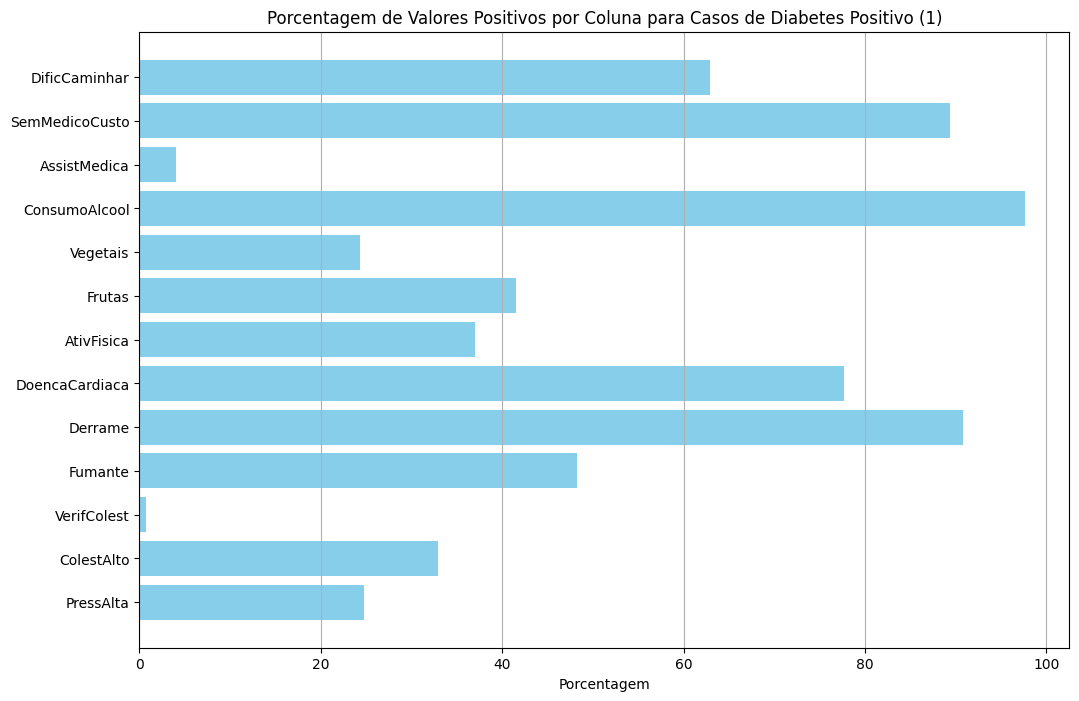

In [ ]:
colunas_analise = [
    'PressAlta', 'ColestAlto', 'VerifColest', 'Fumante', 'Derrame',
    'DoencaCardiaca', 'AtivFisica','Frutas', 'Vegetais',
    'ConsumoAlcool', 'AssistMedica', 'SemMedicoCusto', 'DificCaminhar'
]

resultados = []

def exibir_porcentagens(data, coluna):
    data_grouped = data.groupby("Diabetes")[coluna].value_counts().unstack()

    total_diabetes_1 = data_grouped.loc[1].sum()
    porcentagens_diabetes_1 = (data_grouped.loc[1] / total_diabetes_1) * 100

    for value in porcentagens_diabetes_1.index:
        resultados.append({'Coluna': coluna, 'Valor': value, 'Porcentagem': porcentagens_diabetes_1[value]})

for coluna in colunas_analise:
    exibir_porcentagens(data, coluna)

df_resultados = pd.DataFrame(resultados)

df_resultados_positivos = df_resultados[df_resultados['Valor'] == 0]


plt.figure(figsize=(12, 8))
plt.barh(df_resultados_positivos['Coluna'], df_resultados_positivos['Porcentagem'], color='skyblue')
plt.xlabel('Porcentagem')
plt.title('Porcentagem de Valores Positivos por Coluna para Casos de Diabetes Positivo (1)')
plt.grid(axis='x')
plt.show()

## Outros Tipos de Distribuições - Testes

Multicategóricas Sensíveis

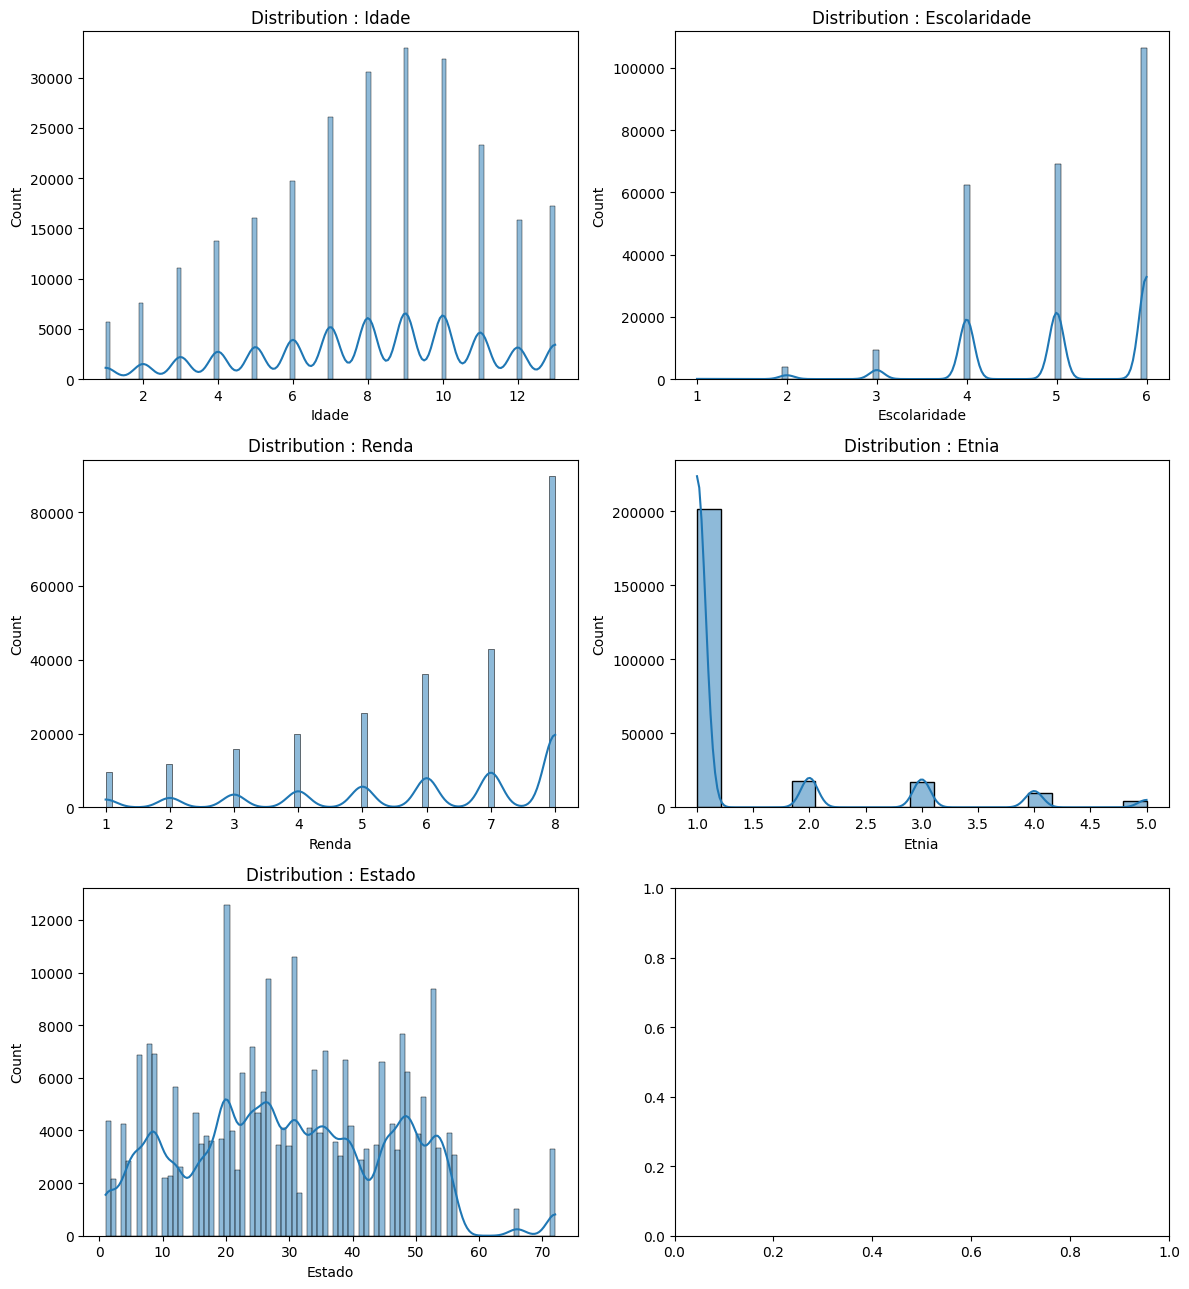

In [ ]:
sensiveis_multi = ['Idade', 'Escolaridade', 'Renda', 'Etnia', 'Estado']

cols = 2
rows = 3

for start in range(0, len(sensiveis_multi), cols * rows):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 13))

    for i in range(start, min(start + cols * rows, len(sensiveis_multi))):
        plt.subplot(rows, cols, i - start + 1)
        sns.histplot(data[sensiveis_multi[i]], kde=True)
        plt.title(f'Distribution : {sensiveis_multi[i]}')

    plt.tight_layout()
    plt.show()


Multicategóricas Não Sensíveis

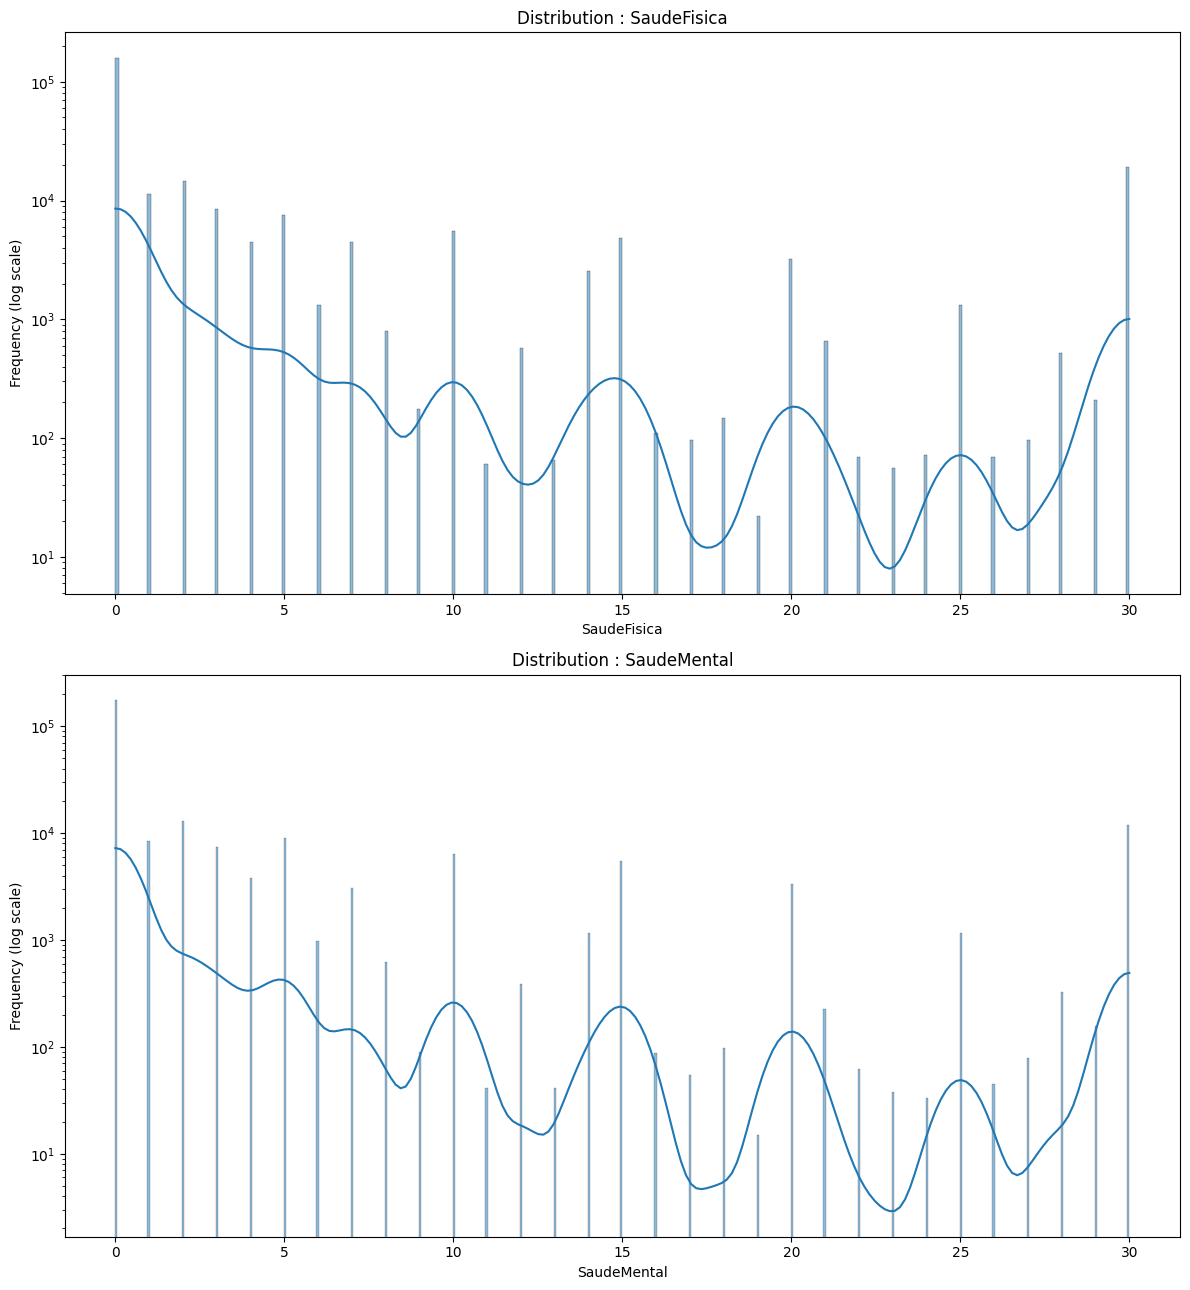

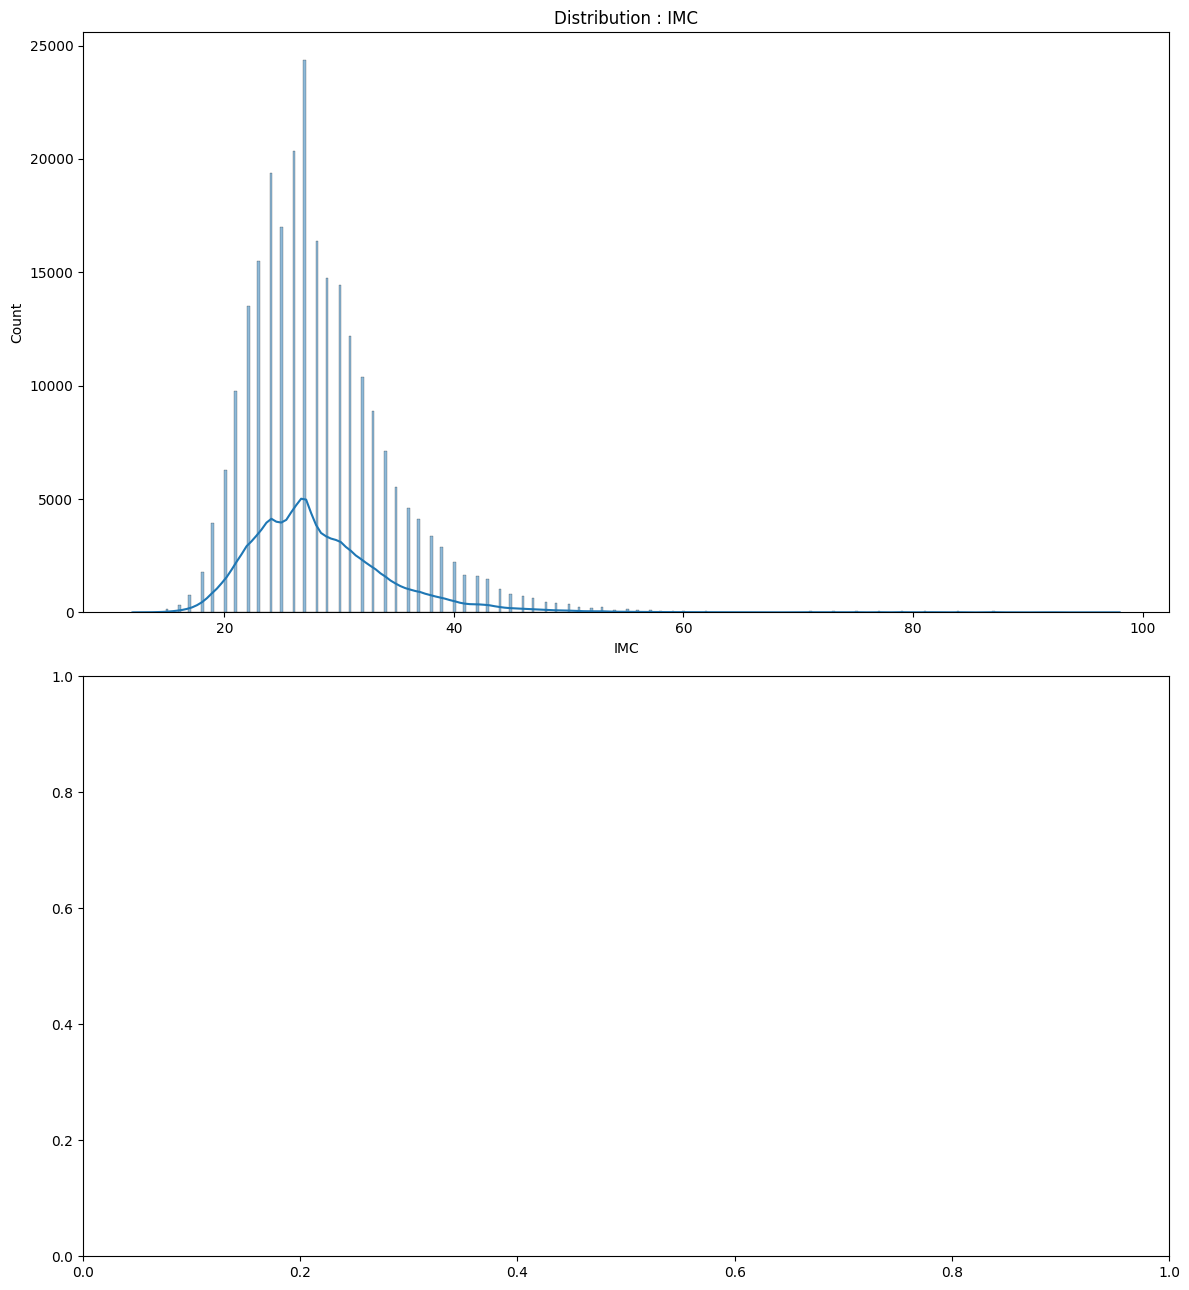

In [ ]:
multi = ['SaudeFisica', 'SaudeMental', 'IMC']

cols = 1
rows = 2

for start in range(0, len(multi), cols * rows):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 13))

    for i in range(start, min(start + cols * rows, len(multi))):
        plt.subplot(rows, cols, i - start + 1)
        sns.histplot(data[multi[i]], kde=True)

        # Condição para alterar o título e os eixos
        if multi[i] == 'IMC':
            plt.title(f'Distribution : {multi[i]}')
            plt.xlabel(multi[i])
        else:
            plt.yscale('log')  # Escala logarítmica no eixo y
            plt.title(f'Distribution : {multi[i]}')
            plt.xlabel(multi[i])
            plt.ylabel('Frequency (log scale)')

    plt.tight_layout()
    plt.show()


Target X Dados Sensíveis

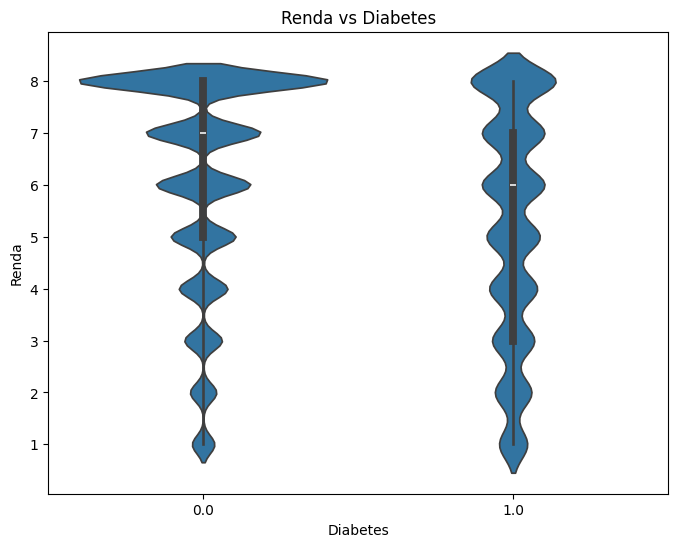

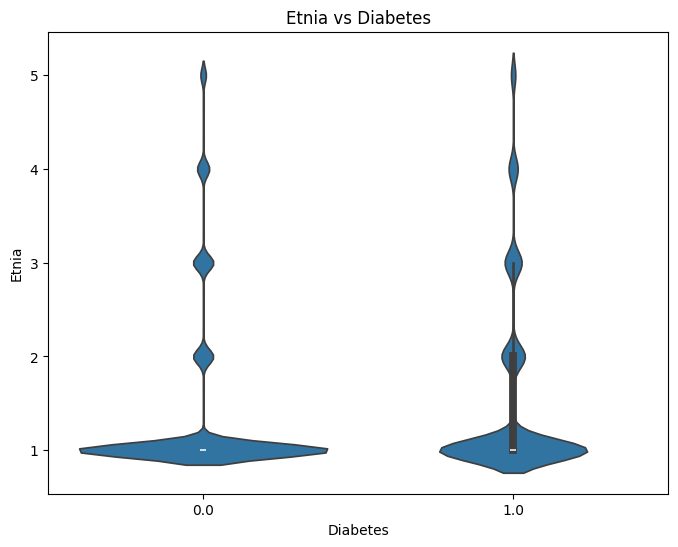

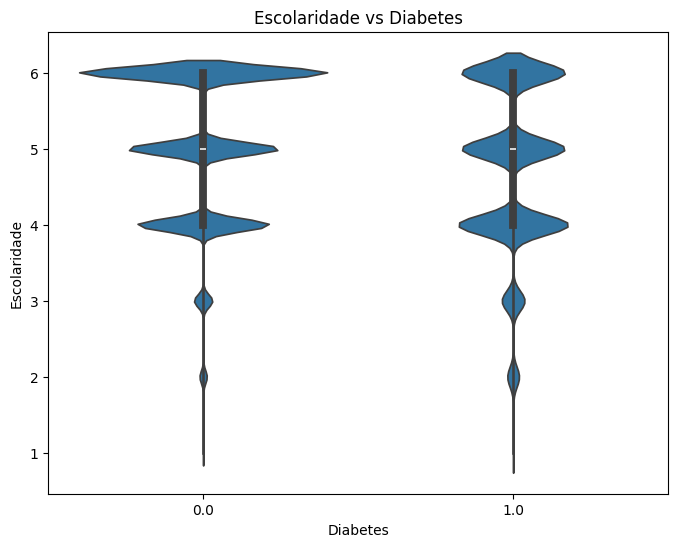

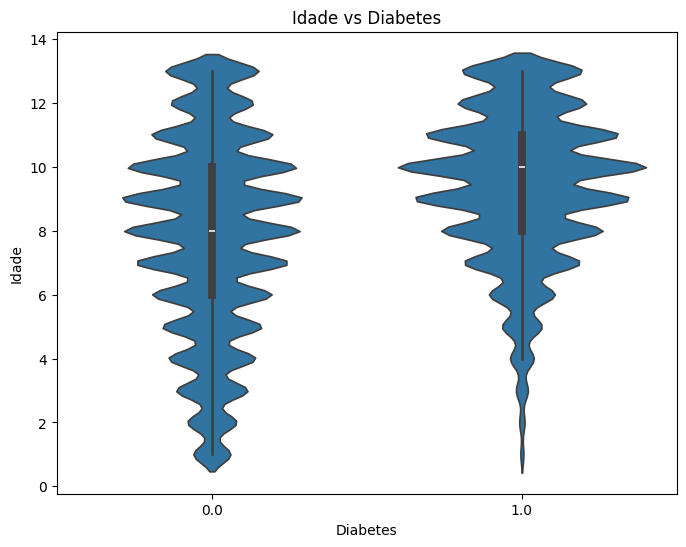

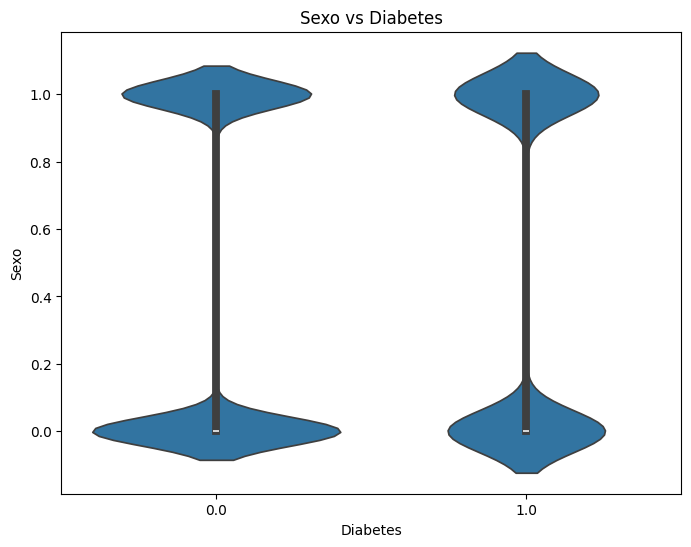

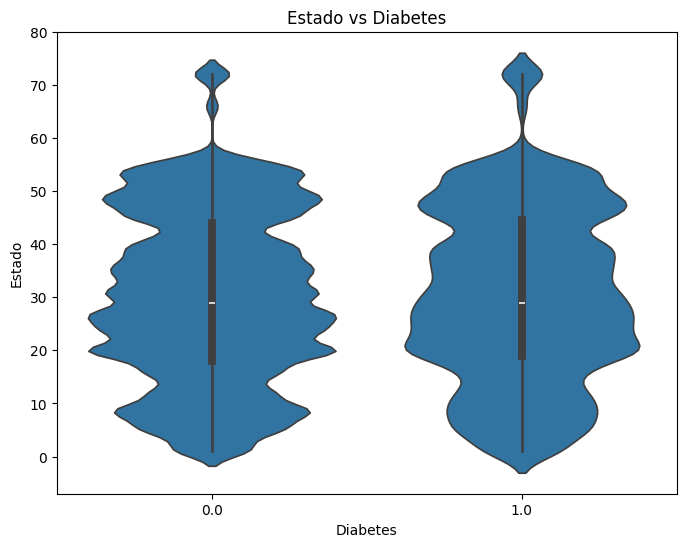

In [ ]:
duplas = [('Renda', 'Diabetes'), ('Etnia', 'Diabetes'), ('Escolaridade', 'Diabetes'),  ('Idade', 'Diabetes'), ('Sexo', 'Diabetes'), ('Estado', 'Diabetes')]

for x, y in duplas:
  plt.figure(figsize=(8, 6))
  sns.violinplot(x=data[y], y=data[x])
  plt.title(f'{x} vs {y}')
  plt.xlabel(y)
  plt.ylabel(x)
  plt.show()

In [ ]:
correlacao_diabetes = data.corr()['Diabetes'].sort_values(ascending = False)
correlacao_diabetes

,Diabetes
Diabetes,1.000000
SaudeGeral,0.293547
PressAlta,0.262925
DificCaminhar,0.218494
IMC,0.216742
ColestAlto,0.200412
DoencaCardiaca,0.177354
Idade,0.177199
SaudeFisica,0.171129
Derrame,0.105863


Diabetes X Col Maior Correlação

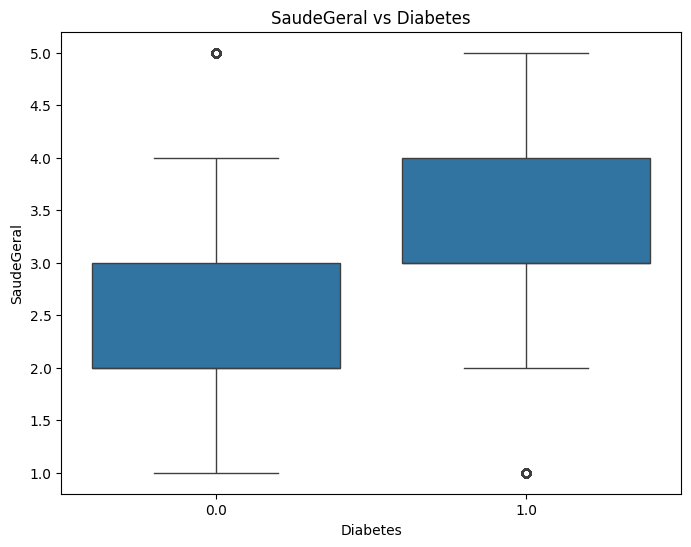

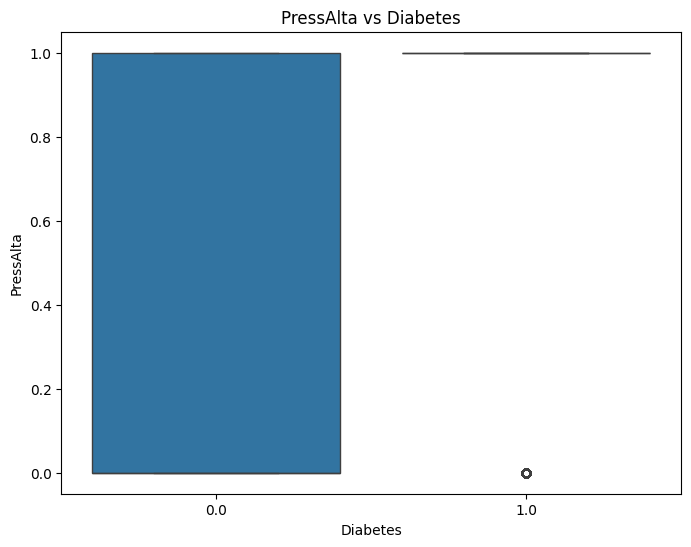

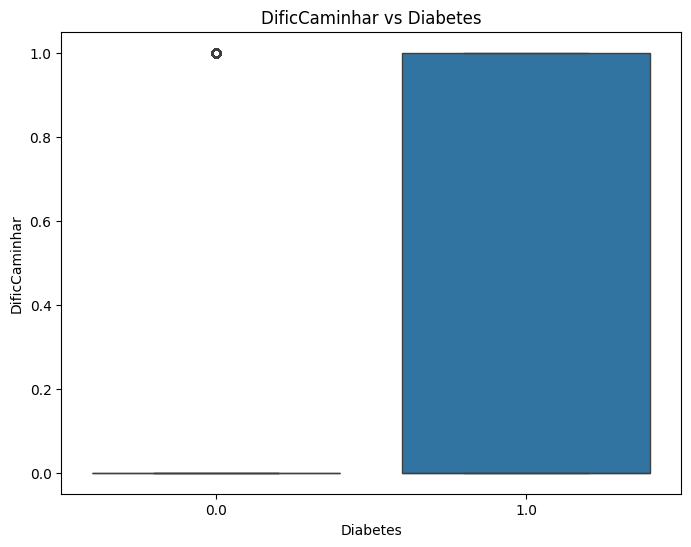

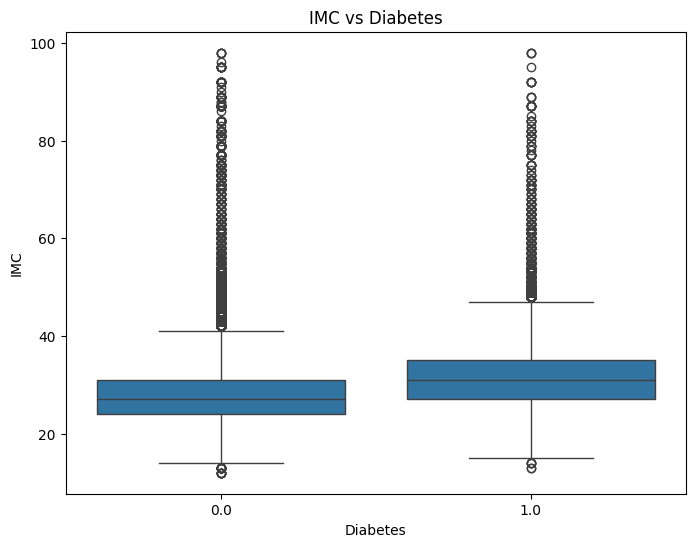

In [ ]:
duplas = [('SaudeGeral', 'Diabetes'), ('PressAlta', 'Diabetes'), ('DificCaminhar', 'Diabetes'), ('IMC', 'Diabetes')]

for x, y in duplas:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data[y], y=data[x], data = data)
  plt.title(f'{x} vs {y}')
  plt.xlabel(y)
  plt.ylabel(x)
  plt.show()

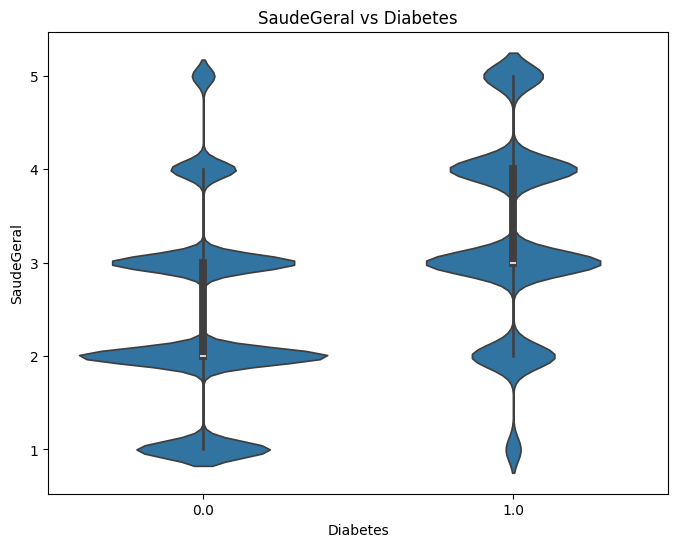

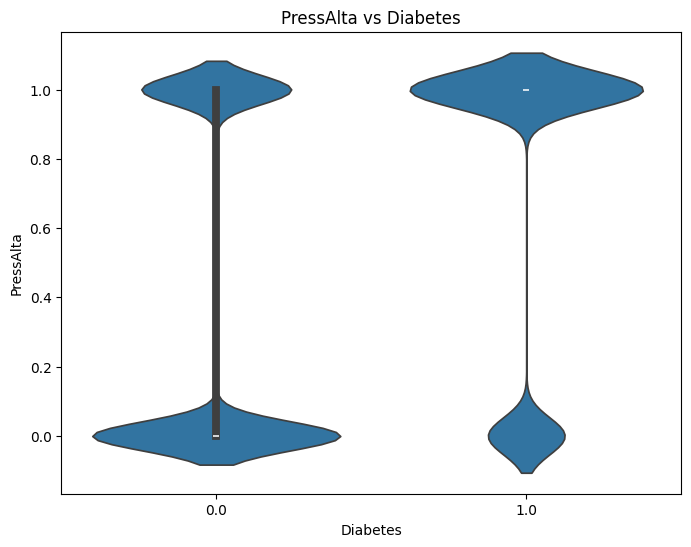

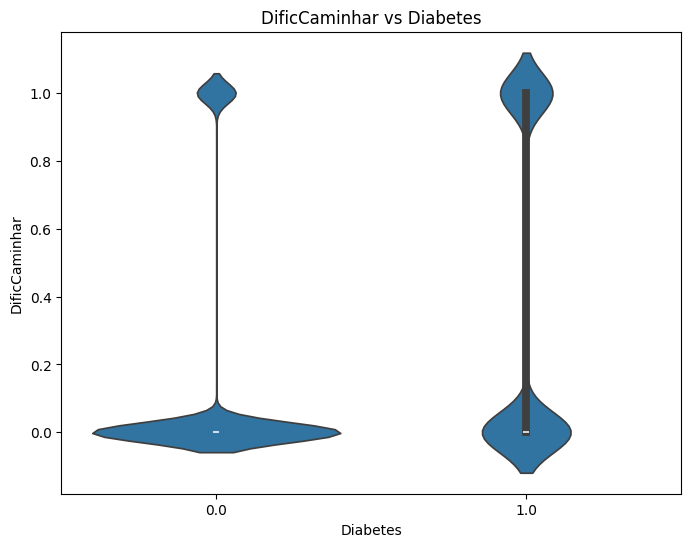

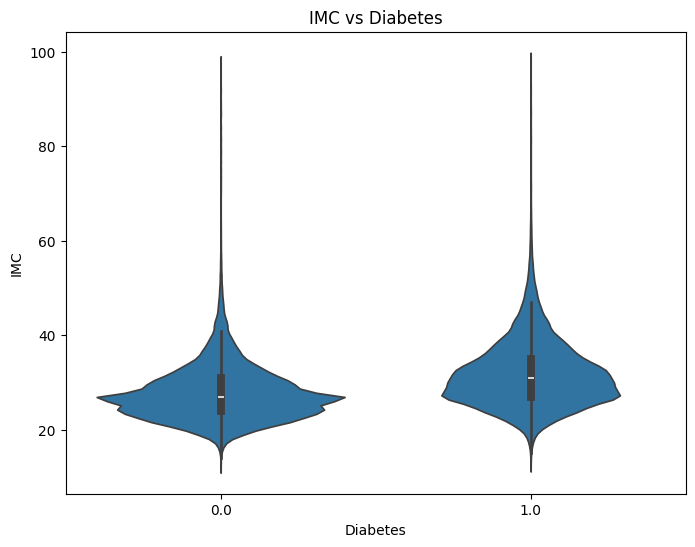

In [ ]:
duplas = [('SaudeGeral', 'Diabetes'), ('PressAlta', 'Diabetes'), ('DificCaminhar', 'Diabetes'), ('IMC', 'Diabetes')]

for x, y in duplas:
  plt.figure(figsize=(8, 6))
  sns.violinplot(x=data[y], y=data[x], data = data)
  plt.title(f'{x} vs {y}')
  plt.xlabel(y)
  plt.ylabel(x)
  plt.show()

Possíveis relações com col sensíveis - testes

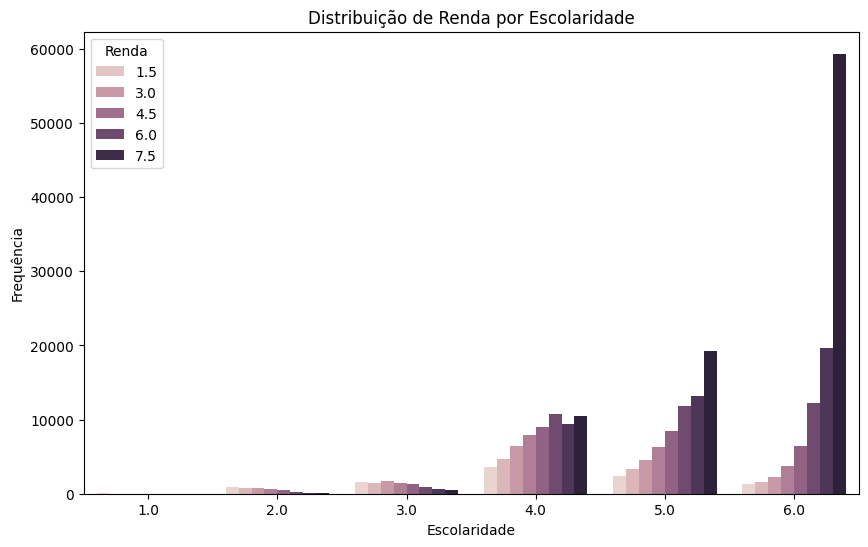

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Escolaridade', hue='Renda', data=data)
plt.title('Distribuição de Renda por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Frequência')
plt.show()

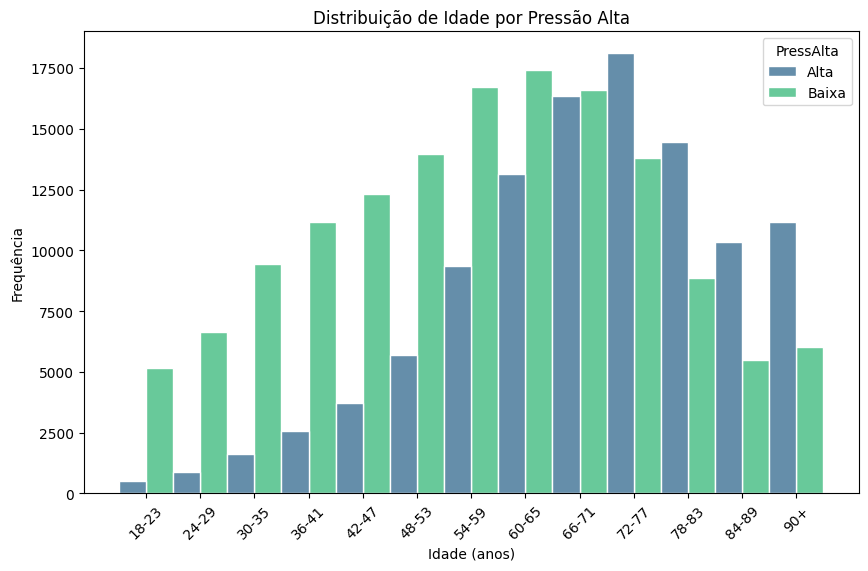

In [ ]:
intervalos = [
    "18-23", "24-29", "30-35", "36-41", "42-47",
    "48-53", "54-59", "60-65", "66-71", "72-77",
    "78-83", "84-89", "90+"
]

plt.figure(figsize=(10, 6))

sns.histplot(
    data=data,
    x='Idade',
    discrete=True,
    edgecolor="white",
    hue=data['PressAlta'].replace({0: 'Baixa', 1: 'Alta'}),
    multiple='dodge',
    palette='viridis'
)

plt.title("Distribuição de Idade por Pressão Alta")
plt.xlabel("Idade (anos)")
plt.ylabel("Frequência")
plt.xticks(range(1, len(intervalos) + 1), intervalos, rotation=45)
plt.show()

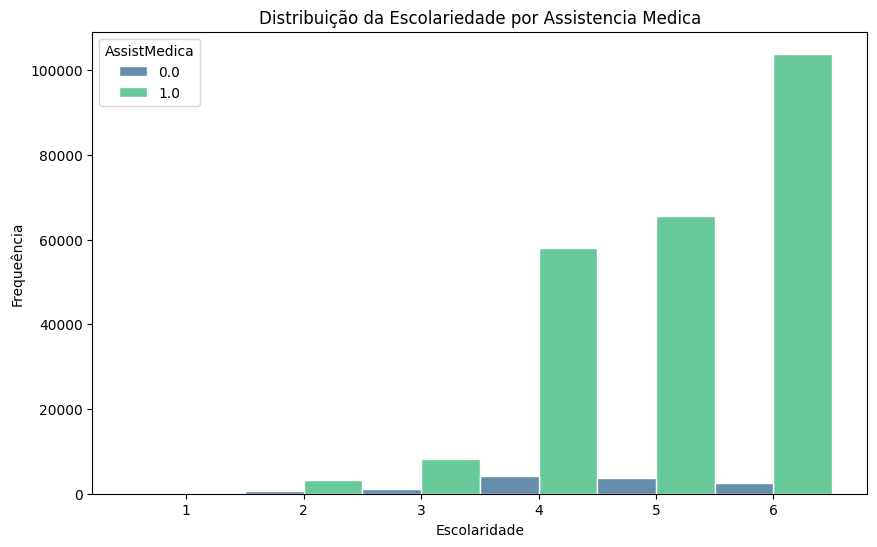

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=data,
    x='Escolaridade',
    discrete=True,
    edgecolor="white",
    hue=data['AssistMedica'],
    multiple='dodge',
    palette='viridis'
)

plt.title("Distribuição da Escolariedade por Assistencia Medica")
plt.xlabel("Escolaridade")
plt.ylabel("Frequeência")
plt.show()

# Correlaçoes

## correlação direta com o target

In [ ]:
correlacao_diabetes = data.corr()['Diabetes'].sort_values(ascending = False)
correlacao_diabetes

,Diabetes
Diabetes,1.000000
SaudeGeral,0.293547
PressAlta,0.262925
DificCaminhar,0.218494
IMC,0.216742
ColestAlto,0.200412
DoencaCardiaca,0.177354
Idade,0.177199
SaudeFisica,0.171129
Derrame,0.105863


In [ ]:
data.corr()

,Diabetes,PressAlta,ColestAlto,VerifColest,IMC,Fumante,Derrame,DoencaCardiaca,AtivFisica,Frutas,Vegetais,ConsumoAlcool,AssistMedica,SemMedicoCusto,SaudeGeral,SaudeMental,SaudeFisica,DificCaminhar,Sexo,Idade,Escolaridade,Renda,Etnia,Estado
Diabetes,1.000000,0.262925,0.200412,0.064512,0.216742,0.060361,0.105863,0.177354,-0.118219,-0.041073,-0.056607,-0.057279,0.016084,0.031956,0.293547,0.068943,0.171129,0.218494,0.031428,0.177199,-0.124144,-0.164140,0.046569,0.007687
PressAlta,0.262925,1.000000,0.298230,0.098203,0.213874,0.097095,0.129356,0.209118,-0.125155,-0.040664,-0.060889,-0.003722,0.038434,0.017193,0.300357,0.056008,0.160988,0.223530,0.052405,0.344232,-0.141230,-0.171398,-0.004841,0.006440
ColestAlto,0.200412,0.298230,1.000000,0.085437,0.106871,0.090984,0.092601,0.180614,-0.077999,-0.040825,-0.039607,-0.011299,0.042216,0.013272,0.208325,0.062129,0.121671,0.144505,0.031292,0.272454,-0.070630,-0.085424,-0.036707,-0.000964
VerifColest,0.064512,0.098203,0.085437,1.000000,0.034414,-0.010037,0.023912,0.043830,0.004621,0.024205,0.006688,-0.023865,0.117495,-0.057439,0.046046,-0.008803,0.031328,0.040461,-0.022111,0.090119,0.002011,0.014199,0.012727,-0.001183
IMC,0.216742,0.213874,0.106871,0.034414,1.000000,0.013650,0.020002,0.052475,-0.147426,-0.087426,-0.062310,-0.049083,-0.018341,0.058536,0.239113,0.085179,0.120847,0.196783,0.042784,-0.037252,-0.103683,-0.099876,0.024658,0.002321
Fumante,0.060361,0.097095,0.090984,-0.010037,0.013650,1.000000,0.061417,0.114346,-0.087425,-0.077884,-0.030702,0.101589,-0.023319,0.048989,0.163045,0.092087,0.116466,0.122194,0.093372,0.120756,-0.162657,-0.124423,-0.044794,-0.015998
Derrame,0.105863,0.129356,0.092601,0.023912,0.020002,0.061417,1.000000,0.202844,-0.069035,-0.013246,-0.040738,-0.017281,0.008629,0.034908,0.177891,0.069765,0.149162,0.176733,0.003268,0.126809,-0.076049,-0.128730,0.006735,-0.003492
DoencaCardiaca,0.177354,0.209118,0.180614,0.043830,0.052475,0.114346,0.202844,1.000000,-0.087189,-0.019758,-0.038679,-0.029128,0.018948,0.030689,0.258067,0.064036,0.181094,0.212370,0.086067,0.221575,-0.099021,-0.140865,-0.014781,0.006393
AtivFisica,-0.118219,-0.125155,-0.077999,0.004621,-0.147426,-0.087425,-0.069035,-0.087189,1.000000,0.142995,0.152926,0.012318,0.035633,-0.061827,-0.266133,-0.125517,-0.219190,-0.253172,0.032503,-0.092211,0.199963,0.198978,-0.035583,-0.020297
Frutas,-0.041073,-0.040664,-0.040825,0.024205,-0.087426,-0.077884,-0.013246,-0.019758,0.142995,1.000000,0.254417,-0.035235,0.031595,-0.044364,-0.103734,-0.068196,-0.044354,-0.048074,-0.091181,0.064735,0.110259,0.079877,-0.015988,-0.013855


## matriz de correlação

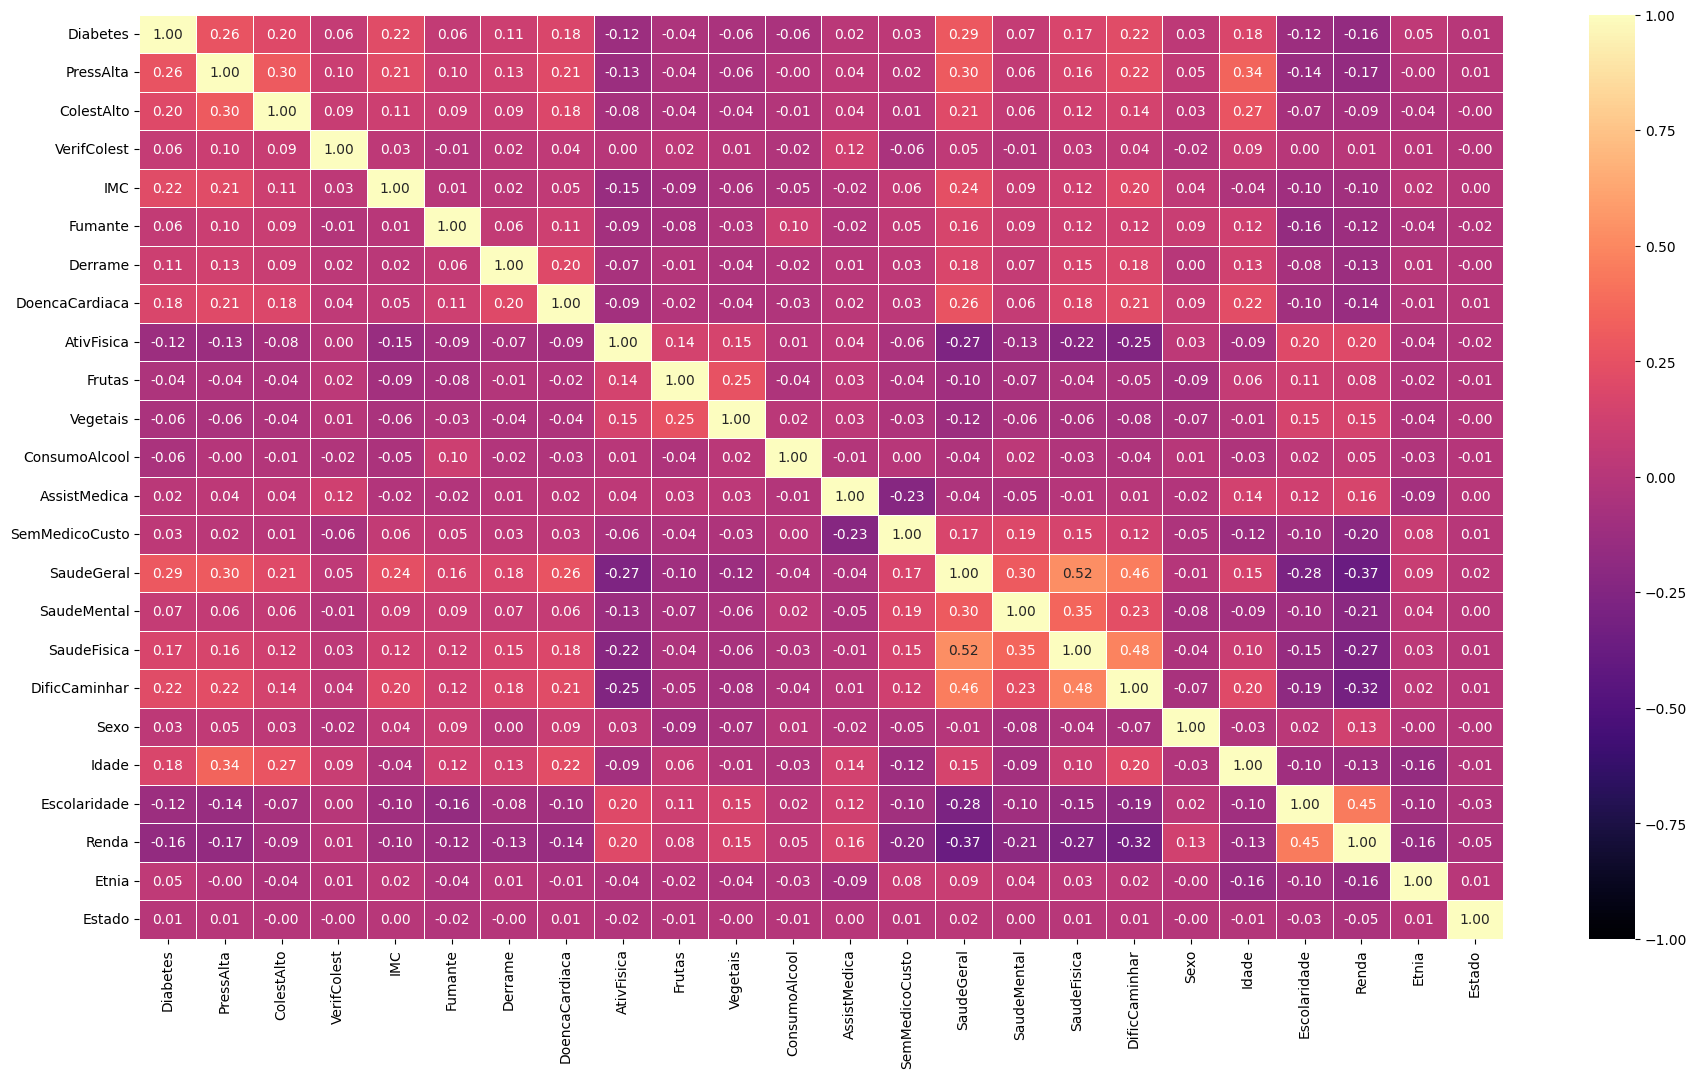

In [ ]:
plt.figure(figsize=(22, 12))
heatmap = sns.heatmap(data.corr(), annot=True, fmt=".2f", vmin= -1, vmax= 1, cmap='magma', linewidths=.5)

## estatísticas descritivas

In [ ]:
for column in data.columns:
    print(f"Coluna: {column}")
    print(f"Média: {data[column].mean()}")
    print(f"Mediana: {data[column].median()}")
    print(f"Desvio Padrão: {data[column].std()}")
    print(f"Moda: {data[column].mode()} ")
    print('\n')

Coluna: Diabetes
Média: 0.13911566925282443
Mediana: 0.0
Desvio Padrão: 0.34606787784770676
Moda: 0    0.0
Name: Diabetes, dtype: float64 


Coluna: PressAlta
Média: 0.42891512604039495
Mediana: 0.0
Desvio Padrão: 0.49492213000657354
Moda: 0    0.0
Name: PressAlta, dtype: float64 


Coluna: ColestAlto
Média: 0.42416301144881835
Mediana: 0.0
Desvio Padrão: 0.4942162709462131
Moda: 0    0.0
Name: ColestAlto, dtype: float64 


Coluna: VerifColest
Média: 0.9628420428923079
Mediana: 1.0
Desvio Padrão: 0.18914910945091526
Moda: 0    1.0
Name: VerifColest, dtype: float64 


Coluna: IMC
Média: 28.38084122369933
Mediana: 27.0
Desvio Padrão: 6.606211922761065
Moda: 0    27.0
Name: IMC, dtype: float64 


Coluna: Fumante
Média: 0.4428374299609889
Mediana: 0.0
Desvio Padrão: 0.49672268094195443
Moda: 0    0.0
Name: Fumante, dtype: float64 


Coluna: Derrame
Média: 0.04046654232960985
Mediana: 0.0
Desvio Padrão: 0.1970511499383383
Moda: 0    0.0
Name: Derrame, dtype: float64 


Coluna: DoencaCardiac

In [ ]:
for column in data.columns:
    if column != 'Diabetes':
        summary = data.groupby(['Diabetes', column]).size().reset_index(name='count')

        summary = summary.set_index(['Diabetes', column])

        total_by_group = summary.groupby(level='Diabetes')['count'].transform('sum')
        summary['percentage'] = (summary['count'] / total_by_group) * 100

        # Reseta o índice para exibição
        summary = summary.reset_index()

        print(f"Resumo para a coluna: {column}")
        print(summary)
        print('\n')



Resumo para a coluna: PressAlta
   Diabetes  PressAlta   count  percentage
0       0.0        0.0  134955    62.33948
1       0.0        1.0   81529    37.66052
2       1.0        0.0    8654    24.73773
3       1.0        1.0   26329    75.26227


Resumo para a coluna: ColestAlto
   Diabetes  ColestAlto   count  percentage
0       0.0         0.0  133279   61.565289
1       0.0         1.0   83205   38.434711
2       1.0         0.0   11525   32.944573
3       1.0         1.0   23458   67.055427


Resumo para a coluna: VerifColest
   Diabetes  VerifColest   count  percentage
0       0.0          0.0    9106    4.206315
1       0.0          1.0  207378   95.793685
2       1.0          0.0     238    0.680330
3       1.0          1.0   34745   99.319670


Resumo para a coluna: IMC
     Diabetes   IMC  count  percentage
0         0.0  12.0      6    0.002772
1         0.0  13.0     18    0.008315
2         0.0  14.0     36    0.016629
3         0.0  15.0    118    0.054507
4         0.0 